# Pré-Processing
## Radiographie Covid-19
### _Asma, Mamaar, Richard_
---

#### Résumé :
Dans le notebook précédent, nous avons relevé plusieurs point à traiter en préparation des données avant la modélisation.
Nous avons trois corrections à faire :
* Redimensionner les images, passer d'un format 299x299 à 256x256.
* Vérifier que les masques collent bien aux images correspondantes.
* Ajouter des données dans les images de la catégorie Covid ou supprimer des données des autres catégories.

Une fois les corrections appliquées, les données seront prêtes à être utilisées pour l'entrainement et l'évaluation de nos modèles de classification.

---
---

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import os
import json
from pathlib import Path
import random
import shutil

# I/ Aperçu des images

## 1. Lecture des images :

Nous allons tout d'abord afficher des images des différentes catégories de manière aléatoire.

On affiche aléatoirement 3 images par catégorie :


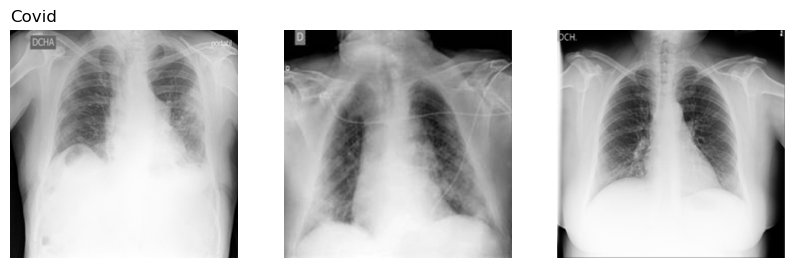

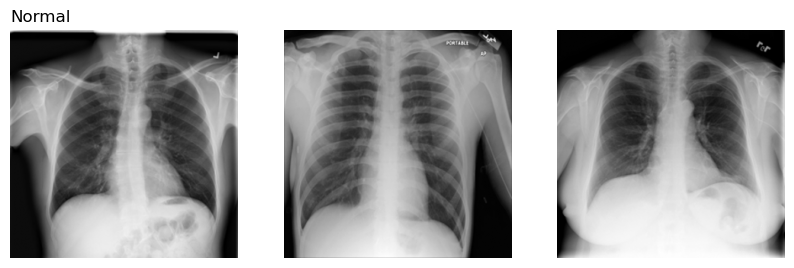

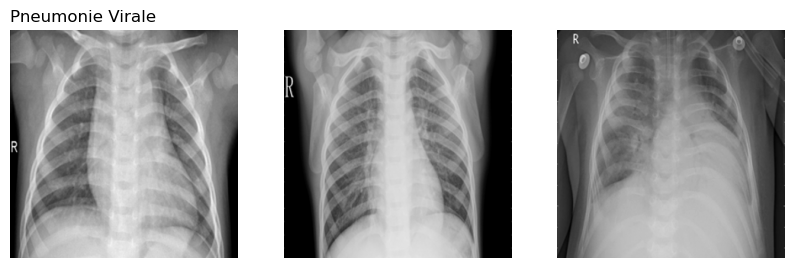

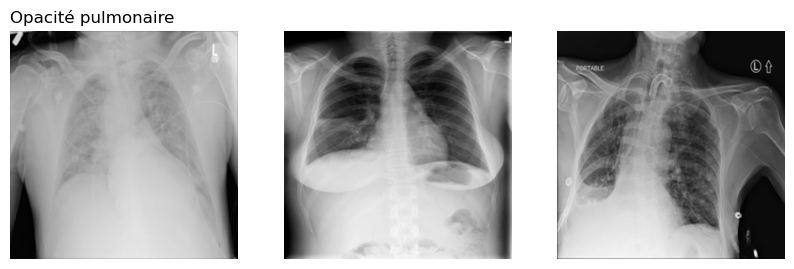

In [2]:
chemin_covid = "C:/Users/Asma/Documents/DataScientest/Projet/data_covid/COVID/images"
chemin_normal = "C:/Users/Asma/Documents/DataScientest/Projet/data_covid/Normal/images"
chemin_pneumonia = "C:/Users/Asma/Documents/DataScientest/Projet/data_covid/Viral Pneumonia/images"
chemin_lung = "C:/Users/Asma/Documents/DataScientest/Projet/data_covid/Lung_Opacity/images"

print("On affiche aléatoirement 3 images par catégorie :")

# COVID
ech_img1 = random.sample(os.listdir(chemin_covid), 3)
plt.figure(figsize=(10,8))
for i, img_nom1 in enumerate(ech_img1):
    img_chemin1 = os.path.join(chemin_covid, img_nom1)
    img1 = cv2.imread(img_chemin1, cv2.IMREAD_GRAYSCALE)
    plt.subplot(1, 3, i+1)
    plt.imshow(img1, cmap='gray')
    plt.axis('off')
    if i == 0:
        plt.title('Covid', loc='left')
plt.show()

#Normal
ech_img2 = random.sample(os.listdir(chemin_normal), 3)
plt.figure(figsize=(10,8))
for j, img_nom2 in enumerate(ech_img2):
    img_chemin2 = os.path.join(chemin_normal, img_nom2)
    img2 = cv2.imread(img_chemin2, cv2.IMREAD_GRAYSCALE)
    plt.subplot(1, 3, j+1)
    plt.imshow(img2, cmap='gray')
    plt.axis('off')
    if j == 0:
        plt.title('Normal', loc='left')
plt.show()

# Pneumonie virale
ech_img3 = random.sample(os.listdir(chemin_pneumonia), 3)
plt.figure(figsize=(10,8))
for k, img_nom3 in enumerate(ech_img3):
    img_chemin3 = os.path.join(chemin_pneumonia, img_nom3)
    img3 = cv2.imread(img_chemin3, cv2.IMREAD_GRAYSCALE)
    plt.subplot(1, 3, k+1)
    plt.imshow(img3, cmap='gray')
    plt.axis('off')
    if k == 0:
        plt.title('Pneumonie Virale', loc='left')
plt.show()

# Opacité pulmonaire
ech_img4 = random.sample(os.listdir(chemin_lung), 3)
plt.figure(figsize=(10,8))
for l, img_nom4 in enumerate(ech_img4):
    img_chemin4 = os.path.join(chemin_lung, img_nom4)
    img4 = cv2.imread(img_chemin4, cv2.IMREAD_GRAYSCALE)
    plt.subplot(1, 3, l+1)
    plt.imshow(img4, cmap='gray')
    plt.axis('off')
    if l == 0:
        plt.title('Opacité pulmonaire', loc='left')
plt.show()

---

## 2. Modification de la taille des images :

On fait un test de redimentionnement sur la première image Covid :

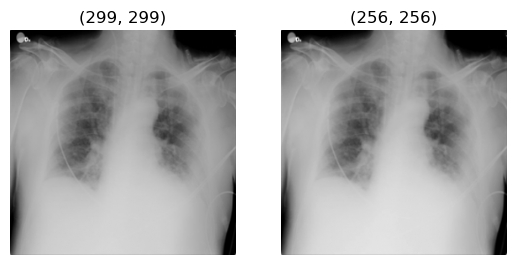

In [3]:
img_covid1 = cv2.imread("C:/Users/Asma/Documents/DataScientest/Projet/data_covid/COVID/images/COVID-1.png", cv2.IMREAD_GRAYSCALE)
img_covid1_resized = cv2.resize(img_covid1, (256,256))

plt.subplot(1, 2, 1)
plt.imshow(img_covid1, cmap='gray')
plt.axis('off')
plt.title(img_covid1.shape)
plt.subplot(1, 2, 2)
plt.imshow(img_covid1_resized, cmap='gray')
plt.axis('off')
plt.title(img_covid1_resized.shape)
plt.show()

Nous testons d'améliorer le contraste des radiographies, un teste est réalisé sur l'image précédente :

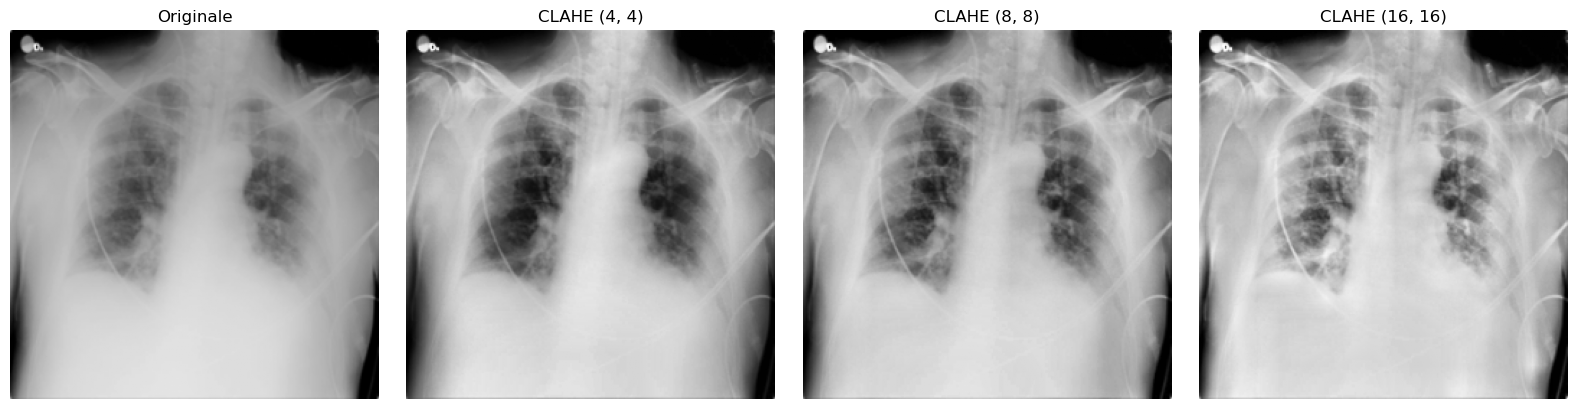

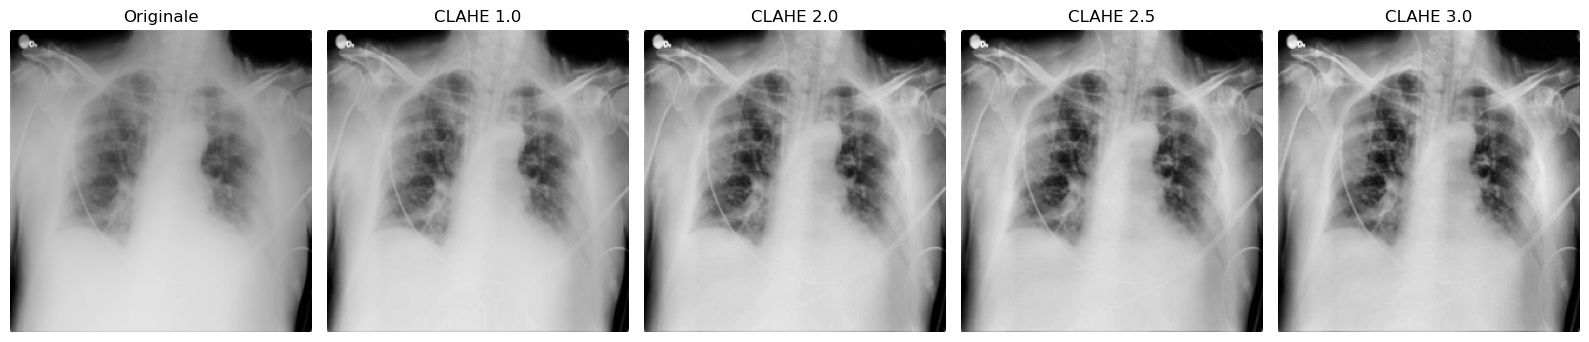

In [10]:
# Teste de différents paramètres.
# paramètre tileGridSize :
sizes = [(4,4),(8,8),(16,16)]
plt.figure(figsize=(16,4))

plt.subplot(1, len(sizes)+1, 1)
plt.imshow(img_covid1_resized, cmap='gray')
plt.title('Originale')
plt.axis('off')

for i, size in enumerate(sizes):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=size)
    contrast = clahe.apply(img_covid1_resized)
    plt.subplot(1, len(sizes)+1, i+2)
    plt.title(f"CLAHE {size}")
    plt.imshow(contrast, cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

# paramètre clipLimit:
clip_limit = [1.0,2.0,2.5,3.0]
plt.figure(figsize=(16,4))

plt.subplot(1, len(clip_limit)+1, 1)
plt.imshow(img_covid1_resized, cmap='gray')
plt.title('Originale')
plt.axis('off')

for i, c in enumerate(clip_limit):
    clahe = cv2.createCLAHE(clipLimit=c, tileGridSize=(8,8))
    contrast = clahe.apply(img_covid1_resized)
    plt.subplot(1, len(clip_limit)+1, i+2)
    plt.title(f"CLAHE {c}")
    plt.imshow(contrast, cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

Les meilleurs paramètres sont ceux correspondants aux paramètres suivants :
* clipLimit = 2.5
* tileGridSize = (8,8)

Le contraste est optimal, il permet une meilleure lecture de l'image sans ajouter d'effet indésirable.

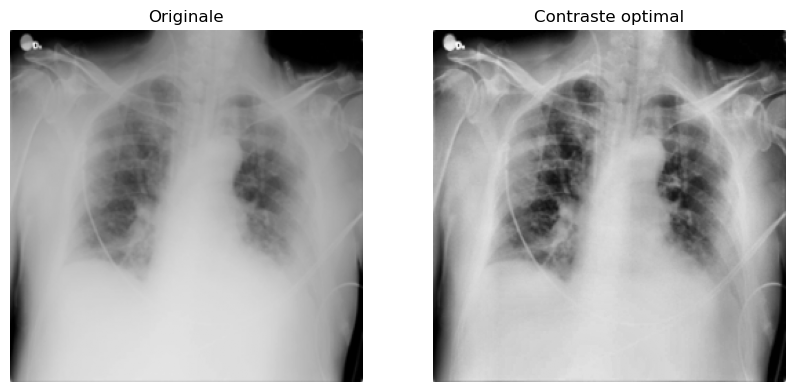

In [12]:
clahe = cv2.createCLAHE(clipLimit=2.5, tileGridSize=(8,8))
contrast = clahe.apply(img_covid1_resized)

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(img_covid1_resized, cmap='gray')
plt.title('Originale')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Contraste optimal')
plt.imshow(contrast, cmap='gray')
plt.axis('off')
plt.show()

On test le masque sur l'image redimentionnée et contrastée :

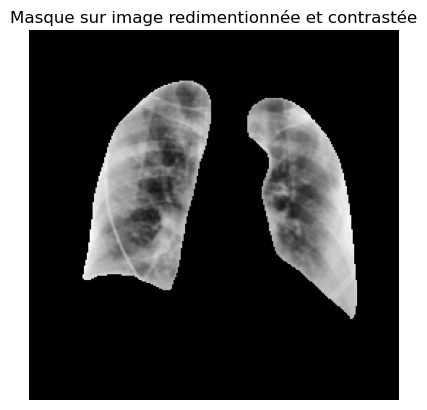

In [15]:
mask_covid1 = cv2.imread("C:/Users/Asma/Documents/DataScientest/Projet/data_covid/COVID/masks/COVID-1.png", cv2.IMREAD_GRAYSCALE)
masked_img_contrast = cv2.bitwise_and(contrast, mask_covid1)

plt.imshow(masked_img_contrast, cmap='gray')
plt.axis('off')
plt.title('Masque sur image redimentionnée et contrastée')
plt.show()

Le masque correspond bien à l'image redimentionnée et contrastée.

---
---

# II/ Traitement des données

Pour le traitement des données, il a été décidé de calibrer le nombre d'images par catégorie par rapport au nombre d'images total de la catégorie COVID. Cette dernière contient 3616 images. Modifier des images médicales étant très délicat car peut fausser l'apprentissage du modèle, nous allons donc séléctionner aléatoirement le même nombre d'images dans la catégorie Normal, et regrouper la séléction dans les catégories Pneumonie virale et opacité pulmonaire en une seule catégorie "Autres".

La séparation des données et le traitement se fera donc dans cet ordre :
1. Nous gardons environ 10 images par catégorie (Covid, Sain, Autres) que le modèle n'aura jamais vu, pour le jour de la soutenance.
2. Séléctionner aléatoirement les 3500 images pour les catégories Covid, Sain et Autres.
3. Redimensionner, contraster et appliquer le masque correspondant aux radiographies séléctionnées.
4. Diviser les données en ensemble d'entrainement, de validation et de teste en proportions 70/15/15.
5. Normaliser les images sur l'ensemble d'entrainement.
6. Appliquer la normalisation aux ensembles d'entrainement, de validation et de teste.

Une fois que ces étapes seront réalisées, les données seront prêtes à être utiliser pour entrainer le ou les modèles choisis.

---

## 1. Sélection aléatoire des données :

In [17]:
classes = ["covid", "sain", "autres"]
splits = ["train", "val", "test", "holdout"]

# Création des dossiers pour la sélection des données.
for split in splits:
    for classe in classes:
        os.makedirs(f"C:/Users/Asma/Documents/DataScientest/Projet/data_covid/data_split/{split}/{classe}", exist_ok=True)

random.seed(213)

# Sélection aléatoire des fichiers holdout:
ech_holdout_sain = random.sample(os.listdir(chemin_normal), 10)
ech_holdout_covid = random.sample(os.listdir(chemin_covid), 10)
ech_holdout_autres = random.sample(os.listdir(chemin_lung), 5) + random.sample(os.listdir(chemin_pneumonia), 5)

# Afin de pouvoir sélectionner aléatoirement les fichiers pour les autres classes il faut exclure les fichiers qui sont dans holdout.
# Création d'une liste filtrée de ces fichiers.

#COVID
img_covid = os.listdir(chemin_covid)
img_covid_filtre = [img for img in img_covid if img not in ech_holdout_covid]
ech_covid = random.sample(img_covid_filtre, 3500)

#Sain
img_sain = os.listdir(chemin_normal)
img_sain_filtre = [img for img in img_sain if img not in ech_holdout_sain]
ech_sain = random.sample(img_sain_filtre, 3500)

#Autres
img_autres = os.listdir(chemin_pneumonia) + os.listdir(chemin_lung)
img_autres_filtre = [img for img in img_autres if img not in ech_holdout_autres]
ech_autres = random.sample(img_autres_filtre, 3500)

---

## 2. Redimensionement et application du masque :

In [18]:
dossier_holdout_sain = "C:/Users/Asma/Documents/DataScientest/Projet/data_covid/data_split/holdout/sain"
dossier_holdout_covid = "C:/Users/Asma/Documents/DataScientest/Projet/data_covid/data_split/holdout/covid"
dossier_holdout_autres = "C:/Users/Asma/Documents/DataScientest/Projet/data_covid/data_split/holdout/autres"

chemin_masks_covid = "C:/Users/Asma/Documents/DataScientest/Projet/data_covid/COVID/masks"
chemin_masks_sain = "C:/Users/Asma/Documents/DataScientest/Projet/data_covid/Normal/masks"
chemin_masks_lung = "C:/Users/Asma/Documents/DataScientest/Projet/data_covid/Lung_Opacity/masks"
chemin_masks_pneumonia = "C:/Users/Asma/Documents/DataScientest/Projet/data_covid/Viral Pneumonia/masks"

# Application du masque et enregistrement des fichiers holdout masqués et redimensionnés:
for fichier in ech_holdout_sain:
    img_chemin = os.path.join(chemin_normal, fichier)
    msk_chemin = os.path.join(chemin_masks_sain, fichier)

    img = cv2.imread(img_chemin, cv2.IMREAD_GRAYSCALE)
    msk = cv2.imread(msk_chemin, cv2.IMREAD_GRAYSCALE)

    img_resized = cv2.resize(img, (256,256))
    contrast = cv2.createCLAHE(clipLimit=2.5, tileGridSize=(8,8)).apply(img_resized)

    img_msk = cv2.bitwise_and(contrast, msk)
    cv2.imwrite(os.path.join(dossier_holdout_sain, fichier), img_msk)

for fichier in ech_holdout_covid:
    img_chemin = os.path.join(chemin_covid, fichier)
    msk_chemin = os.path.join(chemin_masks_covid, fichier)

    img = cv2.imread(img_chemin, cv2.IMREAD_GRAYSCALE)
    msk = cv2.imread(msk_chemin, cv2.IMREAD_GRAYSCALE)

    img_resized = cv2.resize(img, (256,256))
    contrast = cv2.createCLAHE(clipLimit=2.5, tileGridSize=(8,8)).apply(img_resized)

    img_msk = cv2.bitwise_and(contrast, msk)
    cv2.imwrite(os.path.join(dossier_holdout_covid, fichier), img_msk)

liste_lung = os.listdir(chemin_lung)
liste_pneumonia = os.listdir(chemin_pneumonia)
for fichier in ech_holdout_autres:
    if fichier in liste_lung:
        img_chemin = os.path.join(chemin_lung, fichier)
        msk_chemin = os.path.join(chemin_masks_lung, fichier)
    elif fichier in liste_pneumonia:
        img_chemin = os.path.join(chemin_pneumonia, fichier)
        msk_chemin = os.path.join(chemin_masks_pneumonia, fichier)

    img = cv2.imread(img_chemin, cv2.IMREAD_GRAYSCALE)
    msk = cv2.imread(msk_chemin, cv2.IMREAD_GRAYSCALE)

    img_resized = cv2.resize(img, (256,256))
    contrast = cv2.createCLAHE(clipLimit=2.5, tileGridSize=(8,8)).apply(img_resized)

    img_msk = cv2.bitwise_and(contrast, msk)
    cv2.imwrite(os.path.join(dossier_holdout_autres, fichier), img_msk)

In [19]:
# Redimensionnement et masquage des images des autres catégories.
ech_covid_msk = []
ech_sain_msk = []
ech_autres_msk = []

for fichier in ech_covid:
    img_chemin = os.path.join(chemin_covid, fichier)
    msk_chemin = os.path.join(chemin_masks_covid, fichier)
    
    img = cv2.imread(img_chemin, cv2.IMREAD_GRAYSCALE)
    msk = cv2.imread(msk_chemin, cv2.IMREAD_GRAYSCALE)
    
    img_resized = cv2.resize(img, (256,256))
    contrast = cv2.createCLAHE(clipLimit=2.5, tileGridSize=(8,8)).apply(img_resized)
    img_msk = cv2.bitwise_and(contrast, msk)
    ech_covid_msk.append((fichier, img_msk))

for fichier in ech_sain:
    img_chemin = os.path.join(chemin_normal, fichier)
    msk_chemin = os.path.join(chemin_masks_sain, fichier)
    
    img = cv2.imread(img_chemin, cv2.IMREAD_GRAYSCALE)
    msk = cv2.imread(msk_chemin, cv2.IMREAD_GRAYSCALE)
    
    img_resized = cv2.resize(img, (256,256))
    contrast = cv2.createCLAHE(clipLimit=2.5, tileGridSize=(8,8)).apply(img_resized)
    img_msk = cv2.bitwise_and(contrast, msk)
    ech_sain_msk.append((fichier, img_msk))

liste_lung = os.listdir(chemin_lung)
liste_pneumonia = os.listdir(chemin_pneumonia)
for fichier in ech_autres:
    if fichier in liste_lung:
        img_chemin = os.path.join(chemin_lung, fichier)
        msk_chemin = os.path.join(chemin_masks_lung, fichier)
    elif fichier in liste_pneumonia:
        img_chemin = os.path.join(chemin_pneumonia, fichier)
        msk_chemin = os.path.join(chemin_masks_pneumonia, fichier)

    img = cv2.imread(img_chemin, cv2.IMREAD_GRAYSCALE)
    msk = cv2.imread(msk_chemin, cv2.IMREAD_GRAYSCALE)
    
    img_resized = cv2.resize(img, (256,256))
    contrast = cv2.createCLAHE(clipLimit=2.5, tileGridSize=(8,8)).apply(img_resized)
    img_msk = cv2.bitwise_and(contrast, msk)
    ech_autres_msk.append((fichier, img_msk))

print("Taille liste ech_covid_msk:", len(ech_covid_msk))
print("Taille liste ech_sain_msk:", len(ech_sain_msk))
print("Taille liste ech_autres_msk:", len(ech_autres_msk))

Taille liste ech_covid_msk: 3500
Taille liste ech_sain_msk: 3500
Taille liste ech_autres_msk: 3500


On affiche la première image de chacune des listes pour vérifier que le maque a bien été mis.

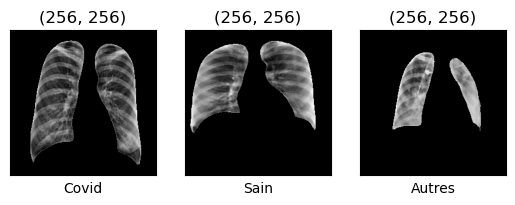

In [20]:
name1,img1 = ech_covid_msk[0]
plt.subplot(1,3,1)
plt.imshow(img1, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.xlabel('Covid')
plt.title(img1.shape)

name2,img2 = ech_sain_msk[0]
plt.subplot(1,3,2)
plt.imshow(img2, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.xlabel('Sain')
plt.title(img2.shape)

name3,img3 = ech_autres_msk[0]
plt.subplot(1,3,3)
plt.imshow(img3, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.xlabel('Autres')
plt.title(img3.shape)
plt.show()

On a bien les bonnes dimensions, et les masques ont bien été appliqués.

---

## 3. Séparation des données :

Dans cette section, on sépare les données en ensembles d'entrainement, de validation et de teste.\
Les proportions choisies sont :
* 70% des données pour l'ensemble d'entrainement
* 15% des données pour l'ensemble de valiadtion
* 15% des données pour l'ensemble de teste.

Pour ce faire, un premier split va être fait en 85/15 entre un ensemble d'entrainement et un ensemble de teste. On ne manipule plus l'ensemble de teste.
On sépare ensuite le reste en 82,4/17,6 entre un ensemble d'entrainement et un ensemble de validation.

In [21]:
from sklearn.model_selection import train_test_split

#Les dossier de l'ensemble train:
dossier_train_sain = "C:/Users/Asma/Documents/DataScientest/Projet/data_covid/data_split/train/sain"
dossier_train_covid = "C:/Users/Asma/Documents/DataScientest/Projet/data_covid/data_split/train/covid"
dossier_train_autres = "C:/Users/Asma/Documents/DataScientest/Projet/data_covid/data_split/train/autres"
#Les dossiers de l'ensemble test:
dossier_test_sain = "C:/Users/Asma/Documents/DataScientest/Projet/data_covid/data_split/test/sain"
dossier_test_covid = "C:/Users/Asma/Documents/DataScientest/Projet/data_covid/data_split/test/covid"
dossier_test_autres = "C:/Users/Asma/Documents/DataScientest/Projet/data_covid/data_split/test/autres"
#Les dossiers de l'ensemble val:
dossier_val_sain = "C:/Users/Asma/Documents/DataScientest/Projet/data_covid/data_split/val/sain"
dossier_val_covid = "C:/Users/Asma/Documents/DataScientest/Projet/data_covid/data_split/val/covid"
dossier_val_autres = "C:/Users/Asma/Documents/DataScientest/Projet/data_covid/data_split/val/autres"

# Covid
train_covid, test_covid = train_test_split(ech_covid_msk, test_size=0.15, random_state=213)
train_covid, val_covid = train_test_split(train_covid, test_size=0.176, random_state=213)
for fichier, img in train_covid:
    cv2.imwrite(os.path.join(dossier_train_covid, fichier), img)
for fichier, img in test_covid:
    cv2.imwrite(os.path.join(dossier_test_covid, fichier), img)
for fichier, img in val_covid:
    cv2.imwrite(os.path.join(dossier_val_covid, fichier), img)

# Sain
train_sain, test_sain = train_test_split(ech_sain_msk, test_size=0.15, random_state=213)
train_sain, val_sain = train_test_split(train_sain, test_size=0.176, random_state=213)
for fichier, img in train_sain:
    cv2.imwrite(os.path.join(dossier_train_sain, fichier), img)
for fichier, img in test_sain:
    cv2.imwrite(os.path.join(dossier_test_sain, fichier), img)
for fichier, img in val_sain:
    cv2.imwrite(os.path.join(dossier_val_sain, fichier), img)

# Autres
train_autres, test_autres = train_test_split(ech_autres_msk, test_size=0.15, random_state=213)
train_autres, val_autres = train_test_split(train_autres, test_size=0.176, random_state=213)
for fichier, img in train_autres:
    cv2.imwrite(os.path.join(dossier_train_autres, fichier), img)
for fichier, img in test_autres:
    cv2.imwrite(os.path.join(dossier_test_autres, fichier), img)
for fichier, img in val_autres:
    cv2.imwrite(os.path.join(dossier_val_autres, fichier), img)

On récapitule les données à disposition dans un tableau :

In [22]:
df = pd.DataFrame({"Train" : {"Covid" : len(train_covid),
                  "Sain" : len(train_sain),
                  "Autres" : len(train_autres)},
                   "Val" : {"Covid" : len(val_covid),
                  "Sain" : len(val_sain),
                  "Autres" : len(val_autres)},
                  "Test" : {"Covid" : len(test_covid),
                  "Sain" : len(test_sain),
                  "Autres" : len(test_autres)}}).T
df = df[["Covid","Sain","Autres"]]
df.index.name="Split"
df

,Covid,Sain,Autres
Split,,,
Train,2451,2451,2451
Val,524,524,524
Test,525,525,525


Maintenant que les données sont bien séparées, nous pouvons procéder à la normalisation.

---

## 4. Normalisation des données :

Dans cette section, nous allons réaliser la normalisation des images sur l'ensemble d'entrainement puis l'appliquer sur les trois ensembles afin d'être utiliser dans le modèle.

Pour normaliser, on calcule la moyenne et l'écart-type de l'ensemble d'entrainement.

In [23]:
X_train = np.array([img for (_,img) in (train_covid+train_sain+train_autres)])
X_train = X_train.astype('float32')/255
mean = X_train.mean()
std = X_train.std()

print("La moyenne de notre ensemble d'entrainement est:", mean)
print("L'écart-type de notre ensemble d'entrainement est:", std)

La moyenne de notre ensemble d'entrainement est: 0.10095608
L'écart-type de notre ensemble d'entrainement est: 0.20103508


On applique à présent la normalisation à tout notre jeu données.

In [25]:
def norm_xy(split_covid, split_sain, split_autres, mean, std, int_labels=True):
    X = np.stack([img for _, img in (split_covid + split_sain + split_autres)]).astype("float32")/255.0
    X = (X-mean)/std

    y = (["covid"]*len(split_covid) + ["sain"]*len(split_sain) + ["autres"]*len(split_autres))
    if int_labels:
        map_lbl = {"sain" : 0, "covid" : 1, "autres" : 2}
        y = np.array([map_lbl[c] for c in y], dtype=np.int64)
    else:
        y = np.array(y)
    return X, y

X_train, y_train = norm_xy(train_covid, train_sain, train_autres, mean, std)
X_val, y_val = norm_xy(val_covid, val_sain, val_autres, mean, std)
X_test, y_test = norm_xy(test_covid, test_sain, test_autres, mean, std)

np.savez_compressed("train_data_norm.npz", X=X_train, y=y_train, mean=mean, std=std)
np.savez_compressed("val_data_norm.npz", X=X_val, y=y_val, mean=mean, std=std)
np.savez_compressed("test_data_norm.npz", X=X_test, y=y_test, mean=mean, std=std)

print("Train:", X_train.shape, y_train.shape)
print("Val:", X_val.shape, y_val.shape)
print("Test:", X_test.shape, y_test.shape)

Train: (7353, 256, 256) (7353,)
Val: (1572, 256, 256) (1572,)
Test: (1575, 256, 256) (1575,)


X contient les images et y les labels (Sain(0), Covid(1) et Autres(2)) correspondants.

Les données normées prêtes à être utilisées ont été stockées dans des fichiers compressés .npz.
Afin de les utiliser, il faudra les charger avec un "np.load".

---